In [6]:
# Step 1: Install the Kaggle API
!pip install kaggle

# Step 2: Upload kaggle.json (the API token file)
from google.colab import files
files.upload()  # Upload the kaggle.json file you downloaded from Kaggle

# Step 3: Setup Kaggle API credentials
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the IMDB dataset from Kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Step 5: Unzip the dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:00<00:00, 131MB/s] 
100% 25.7M/25.7M [00:00<00:00, 124MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import csv

In [8]:
df=pd.read_csv('/content/IMDB Dataset.csv',header=None)

In [10]:
df=df[1:]

In [11]:
df

,0,1
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [12]:
df.columns=['review','sentiment']

In [13]:
df

,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [14]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


<BarContainer object of 2 artists>

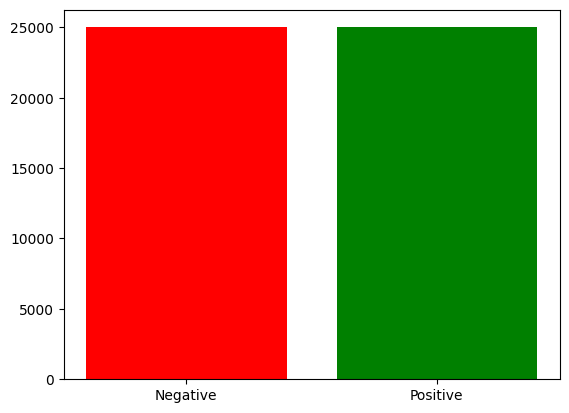

In [15]:
plt.bar(['Negative','Positive'],df['sentiment'].value_counts(),color=['red','green'])

<Axes: >

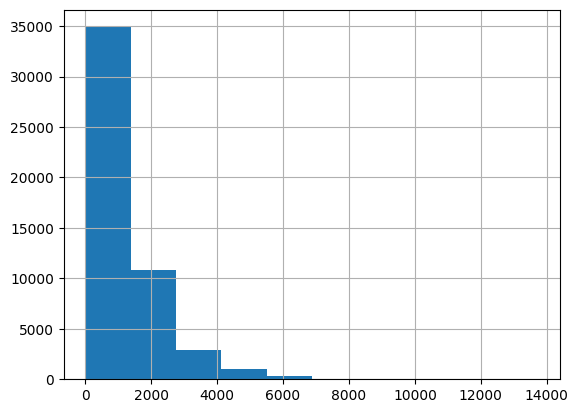

In [16]:
df['review'].str.len().hist()

In [17]:
df['review'][1]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [18]:
#remove html tags
import re
def remove_tags(text):
    return re.sub('<[^<]+?>','',text)

In [19]:
df['review']=df['review'].apply(remove_tags)

<ipython-input-19-16f7647403ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_tags)


In [20]:
#remove special characters like !,@,#,$,%,^,&,*,(,),_,+,= etc
def remove_special_characters(text):
    return re.sub('[^a-zA-Z0-9\s]','',text)

In [21]:
df['review']=df['review'].apply(remove_special_characters)

<ipython-input-21-1e734ac5f4e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_special_characters)


In [22]:
df['review'][1]

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

In [23]:
#remove extra spaces
def remove_extra_spaces(text):
    return re.sub(' +',' ',text)

In [24]:
df['review']=df['review'].apply(remove_extra_spaces)

<ipython-input-24-4fd669181d9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_extra_spaces)


In [25]:
#remove urls
def remove_urls(text):
    return re.sub(r'http\S+|www\S+','',text)

In [26]:
df['review']=df['review'].apply(remove_urls)

<ipython-input-26-ccb9311deac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_urls)


In [27]:
#convert to lower case
def to_lower(text):
    return text.lower()

In [28]:
df['review']=df['review'].apply(to_lower)

<ipython-input-28-c00628cfff9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(to_lower)


In [29]:
df['review']

,review
1,one of the other reviewers has mentioned that ...
2,a wonderful little production the filming tech...
3,i thought this was a wonderful way to spend ti...
4,basically theres a family where a little boy j...
5,petter matteis love in the time of money is a ...
...,...
49996,i thought this movie did a down right good job...
49997,bad plot bad dialogue bad acting idiotic direc...
49998,i am a catholic taught in parochial elementary...
49999,im going to have to disagree with the previous...


In [30]:
#remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)

In [31]:
df['review']=df['review'].apply(remove_punctuation)

<ipython-input-31-d11ba9a2b9bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_punctuation)


In [32]:
df['review']

,review
1,one of the other reviewers has mentioned that ...
2,a wonderful little production the filming tech...
3,i thought this was a wonderful way to spend ti...
4,basically theres a family where a little boy j...
5,petter matteis love in the time of money is a ...
...,...
49996,i thought this movie did a down right good job...
49997,bad plot bad dialogue bad acting idiotic direc...
49998,i am a catholic taught in parochial elementary...
49999,im going to have to disagree with the previous...


In [33]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text]

In [35]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 26.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [36]:
import spacy

# Load SpaCy model (disable unnecessary components for speed)
nlp = spacy.load("en_core_web_md", disable=["parser", "ner", "tagger", "attribute_ruler"])

# Function to lemmatize a single document
def lemmatize_spacy(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Function to apply lemmatization in batches
def batch_lemmatize(df, column_name, batch_size=1000):
    for i in range(0, len(df), batch_size):
        # Process the batch and update the DataFrame
        df.loc[i:i + batch_size - 1, column_name] = df.loc[i:i + batch_size - 1, column_name].apply(lemmatize_spacy)
    return df

# Example usage
df = batch_lemmatize(df, 'review', batch_size=1000)


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/usr/local/lib/p

In [37]:
# from transformers import GPT2Tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# df['review'] = df['review'].apply(lambda x: tokenizer.tokenize(x) if pd.notnull(x) else x)


In [38]:
# #stopwords removal
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# def remove_stopwords(text):
#     return [word for word in text if word not in stop_words]

In [39]:
# df['review']=df['review'].apply(remove_stopwords)

In [40]:
df['review']

,review
1,one of the other reviewers has mentioned that ...
2,a wonderful little production the filming tech...
3,i thought this was a wonderful way to spend ti...
4,basically there s a family where a little boy ...
5,petter matteis love in the time of money is a ...
...,...
49996,i thought this movie did a down right good job...
49997,bad plot bad dialogue bad acting idiotic direc...
49998,i am a catholic taught in parochial elementary...
49999,i m going to have to disagree with the previou...


In [41]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name).to(device)

# Set the model to evaluation mode
model.eval()

# Function to get embeddings
def get_embeddings(text):
    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128).to(device)

    # Generate embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the last hidden state
    last_hidden_state = outputs.last_hidden_state

    # Use mean pooling to get a single vector for the entire text
    embeddings = torch.mean(last_hidden_state, dim=1)

    return embeddings.cpu().numpy().flatten()
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the last hidden state
    last_hidden_state = outputs.last_hidden_state

    # Use mean pooling to get a single vector for the entire text
    embeddings = torch.mean(last_hidden_state, dim=1)

    return embeddings.numpy().flatten()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [42]:
# def get_embeddings(tokenized_review):
#     # Convert tokens to input IDs
#     input_ids = tokenizer.convert_tokens_to_ids(tokenized_review)

#     # Convert input IDs to tensor and add batch dimension
#     input_ids_tensor = torch.tensor([input_ids])

#     # Get embeddings from GPT-2 model
#     with torch.no_grad():
#         outputs = model(input_ids_tensor)
#         last_hidden_state = outputs.last_hidden_state  # Embeddings for all tokens

#     return last_hidden_state.squeeze(0).numpy()

In [43]:
df['embeddings'] = df['review'].apply(get_embeddings)

<ipython-input-43-90312b81c4f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = df['review'].apply(get_embeddings)


In [44]:
df['embeddings']

,embeddings
1,"[-0.28122926, 0.013490269, -0.42327517, -0.045..."
2,"[0.096121565, -0.10600998, -0.4809509, -0.1501..."
3,"[-0.022799378, 0.12145137, -0.33011484, -0.105..."
4,"[-0.037266612, 0.088143885, -0.16033384, -0.13..."
5,"[0.0754323, 0.043938637, -0.48235124, -0.13308..."
...,...
49996,"[0.08818814, -0.028658807, 0.12956262, 0.02772..."
49997,"[-0.002391261, 0.24710044, -0.47888193, 0.0780..."
49998,"[0.03770852, -0.11558943, -0.6648103, 0.052974..."
49999,"[0.059148915, -0.039886937, -0.46916574, -0.02..."


In [45]:
df.to_csv('simple.csv')

In [48]:
#so last column value is emtpy
df=df[:-1]

In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Optionally, you can print the mapping for reference
print("Classes:", label_encoder.classes_)


Classes: ['negative' 'positive']


<ipython-input-49-998ecacc6b40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = label_encoder.fit_transform(df['sentiment'])


In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X = pd.DataFrame(df['embeddings'].tolist())
y = df['sentiment']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [54]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Naive Bayes Results:
Accuracy: 0.7379
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      5000
           1       0.75      0.72      0.73      5000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [55]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Results:
Accuracy: 0.7997
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5000
           1       0.79      0.81      0.80      5000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [56]:
# Logistic Regression
lr_model = LogisticRegression()  # Increase max_iter if needed
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))


Logistic Regression Results:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5000
           1       0.83      0.81      0.82      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [58]:
X = np.array(df['embeddings'].tolist())
y = np.array(df['sentiment'].tolist())

# Step 2: Split the DataFrame into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [59]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [61]:
# Reshape the data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [62]:
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5678 - loss: 0.6741 - val_accuracy: 0.6438 - val_loss: 0.6296
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6588 - loss: 0.6230 - val_accuracy: 0.6665 - val_loss: 0.6085
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.6716 - loss: 0.6109 - val_accuracy: 0.6951 - val_loss: 0.5751
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.6993 - loss: 0.5841 - val_accuracy: 0.6875 - val_loss: 0.5825
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.7105 - loss: 0.5724 - val_accuracy: 0.7321 - val_loss: 0.5296
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7229 - loss: 0.5542 - val_accuracy: 0.7363 - val_loss: 0.5208
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.7306 - loss: 0.5439 - val_accuracy: 0.7360 - val_loss: 0.5246
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7316 - loss: 0.5429 - 

In [63]:
# Evaluation
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

print("LSTM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
LSTM Results:
Accuracy: 0.7424
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5000
           1       0.75      0.73      0.74      5000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [64]:
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model


In [65]:
# Transformer block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection
    x_ff = Dense(ff_dim, activation="relu")(x)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    return LayerNormalization(epsilon=1e-6)(x + x_ff)  # Residual connection


In [66]:
# Build the Transformer model
def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = GlobalAveragePooling1D(data_format='channels_last')(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(dropout)(x)
    outputs = Dense(1, activation="sigmoid")(x)  # For binary classification
    return Model(inputs, outputs)

In [67]:
# Hyperparameters for Transformer
input_shape = (X_train.shape[1], 1)  # Assuming the shape of your embeddings
head_size = 64
num_heads = 4
ff_dim = 32
num_transformer_blocks = 3
mlp_units = [128]
dropout = 0.1


In [68]:
# Create the model
transformer_model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout)
transformer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Reshape the data for Transformer
X_train_reshaped_transformer = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped_transformer = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [70]:
# Train the model
transformer_model.fit(X_train_reshaped_transformer, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped_transformer, y_test))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 244ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 212ms/step - accuracy: 0.4948 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 209ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 209ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.4991 -

In [71]:
# Evaluation
y_pred_transformer = (transformer_model.predict(X_test_reshaped_transformer) > 0.5).astype("int32")

print("\nTransformer Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_transformer))
print(classification_report(y_test, y_pred_transformer))

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step

Transformer Results:
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5000
           1       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
#BEST MODEL Logistic Regression Results: 82%

In [87]:
#  Save the model using joblib
import joblib
model_filename = 'logistic_regression_model.joblib'
joblib.dump(lr_model, model_filename)
print(f"\nModel saved as {model_filename}")


Model saved as logistic_regression_model.joblib
